<a href="https://colab.research.google.com/github/cs-devika/assignment_2/blob/main/casestudy_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
adult_data = pd.read_csv('/content/adult_dataset.csv')
adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K.
48838,64.0,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40.0,United-States,<=50K.
48839,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States,<=50K.
48840,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States,<=50K.


In [3]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [4]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [5]:
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,46400.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,46400.000000
mean,38.679116,1.896641e+05,10.078089,1079.067626,87.502314,40.448599
std,13.952954,1.056040e+05,2.570973,7452.019058,403.004552,12.646992
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


In [6]:
adult_data.shape

(48842, 15)

In [7]:
adult_data.duplicated().sum()

np.int64(16)

In [8]:
adult_data[adult_data.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5104,90.0,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35.0,United-States,<=50K
9171,21.0,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10.0,United-States,<=50K
11631,20.0,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10.0,United-States,<=50K
17040,46.0,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40.0,United-States,<=50K
18698,19.0,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
22300,25.0,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40.0,Guatemala,<=50K
22367,44.0,Private,367749,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45.0,Mexico,<=50K
25872,23.0,Private,240137,5th-6th,3,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,55.0,Mexico,<=50K
28230,27.0,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40.0,United-States,<=50K
31993,19.0,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14.0,United-States,<=50K


In [9]:
adult_data.drop_duplicates(inplace = True)

In [10]:
adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K.
48838,64.0,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40.0,United-States,<=50K.
48839,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States,<=50K.
48840,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States,<=50K.


In [11]:
adult_data.duplicated().sum()

np.int64(0)

find missing values

In [12]:
adult_data.isnull().sum()

,0
age,2442
workclass,3362
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0


In [13]:
adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K.
48838,64.0,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40.0,United-States,<=50K.
48839,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States,<=50K.
48840,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States,<=50K.


In [14]:
adult_data.drop('income', axis=1, inplace=True)

In [15]:
adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States
48838,64.0,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40.0,United-States
48839,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States
48840,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States


Replacing

In [16]:
adult_data.replace("?", np.nan, inplace=True)


In [17]:
adult_data['age'].fillna(adult_data['age'].mean(), inplace=True)


/tmp/ipython-input-3854629137.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data['age'].fillna(adult_data['age'].mean(), inplace=True)


In [18]:
adult_data.isnull().sum()

,0
age,0
workclass,5125
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,5115
relationship,0
race,0
sex,0


In [19]:
adult_data['workclass'].fillna(adult_data['workclass'].mode()[0], inplace=True)

/tmp/ipython-input-2360820180.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data['workclass'].fillna(adult_data['workclass'].mode()[0], inplace=True)


In [20]:
adult_data['occupation'].fillna(adult_data['occupation'].mode()[0], inplace=True)

/tmp/ipython-input-600440722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data['occupation'].fillna(adult_data['occupation'].mode()[0], inplace=True)


In [21]:
adult_data['hours-per-week'].fillna(adult_data['hours-per-week'].median(), inplace=True)

/tmp/ipython-input-1608162254.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data['hours-per-week'].fillna(adult_data['hours-per-week'].median(), inplace=True)


In [22]:
adult_data['native-country'].fillna(adult_data['native-country'].mode()[0], inplace=True)

/tmp/ipython-input-2528287188.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data['native-country'].fillna(adult_data['native-country'].mode()[0], inplace=True)


In [23]:
adult_data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


encoding

In [24]:
adult_data = pd.get_dummies(adult_data, columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country'], drop_first=True)


In [25]:
adult_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39.0,77516,13,2174,0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50.0,83311,13,0,0,13.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38.0,215646,9,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,53.0,234721,7,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28.0,338409,13,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,215419,13,0,0,36.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48838,64.0,321403,9,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48839,38.0,374983,13,0,0,50.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48840,44.0,83891,13,5455,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


outliers

to identify num col

In [26]:
num_cols = adult_data.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

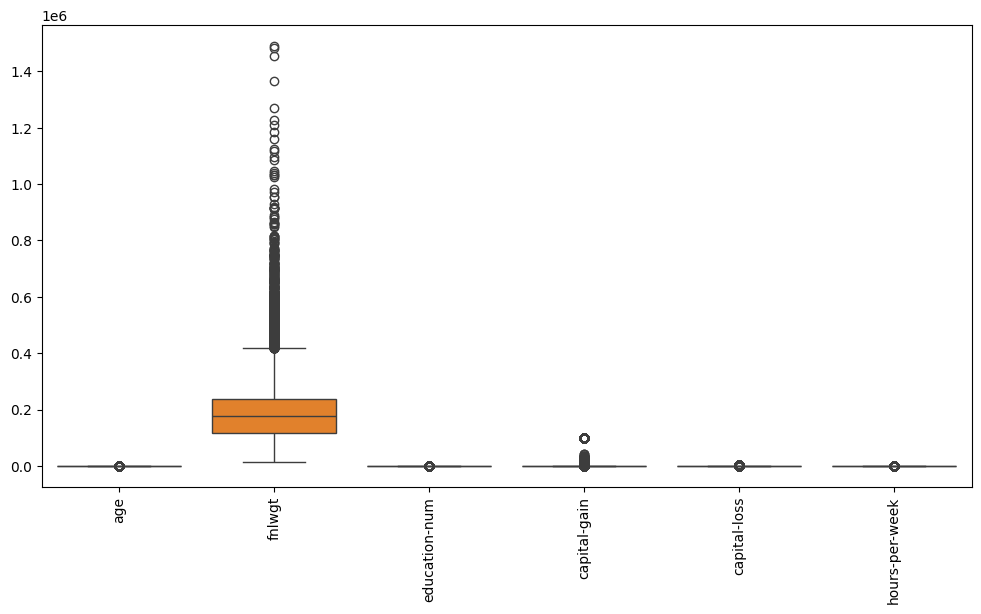

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=adult_data[num_cols])
plt.xticks(rotation=90)
plt.show()

In [28]:
for col in num_cols:
    Q1 = adult_data[col].quantile(0.25)
    Q3 = adult_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    adult_data[col] = adult_data[col].clip(lower, upper)

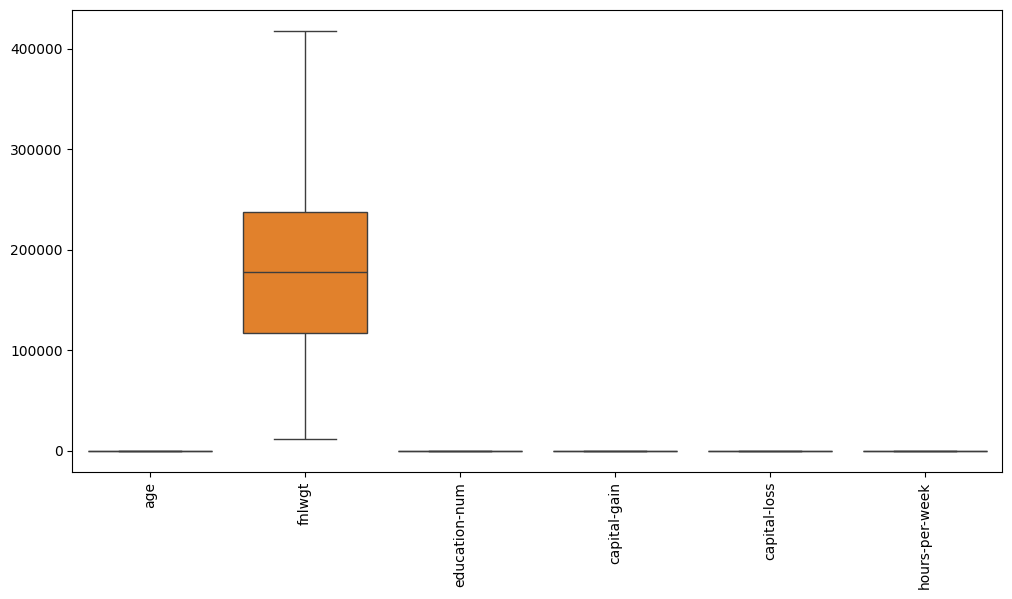

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(data=adult_data[num_cols])
plt.xticks(rotation=90)
plt.show()

scaling

In [30]:
scaler = StandardScaler()
scaled = scaler.fit_transform(adult_data[num_cols])

This puts the scaled values back into the original DataFrame

In [31]:
adult_data[num_cols] = scaled

In [32]:
scaled

array([[ 0.02879496, -1.14615176,  1.1713442 ,  0.        ,  0.        ,
        -0.18737045],
       [ 0.85802794, -1.08535479,  1.1713442 ,  0.        ,  0.        ,
        -1.43041371],
       [-0.04658986,  0.3030089 , -0.4567718 ,  0.        ,  0.        ,
        -0.18737045],
       ...,
       [-0.04658986,  1.97465817,  1.1713442 ,  0.        ,  0.        ,
         1.47002055],
       [ 0.40571904, -1.07926985,  1.1713442 ,  0.        ,  0.        ,
        -0.18737045],
       [-0.27274431, -0.04842803,  1.1713442 ,  0.        ,  0.        ,
         1.8843683 ]])

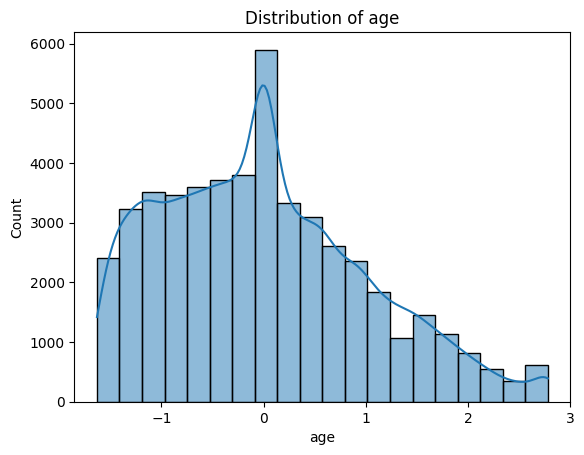

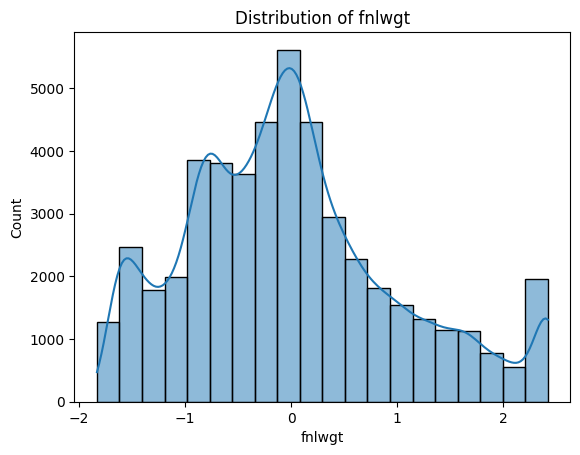

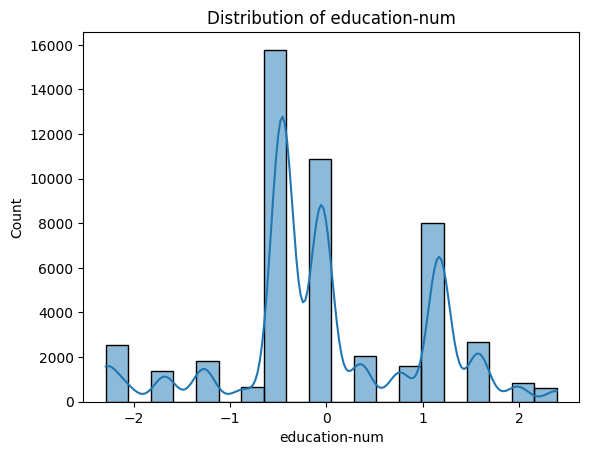

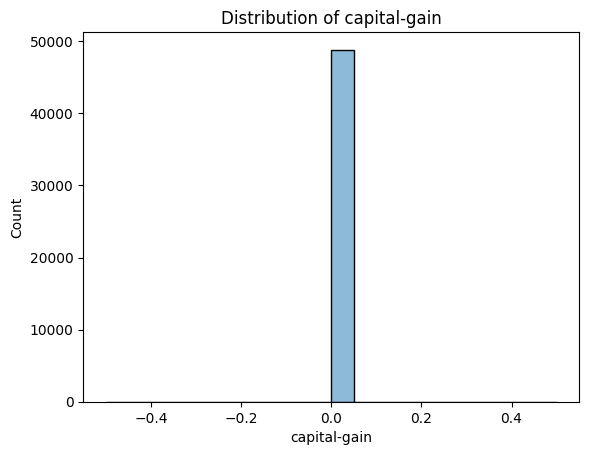

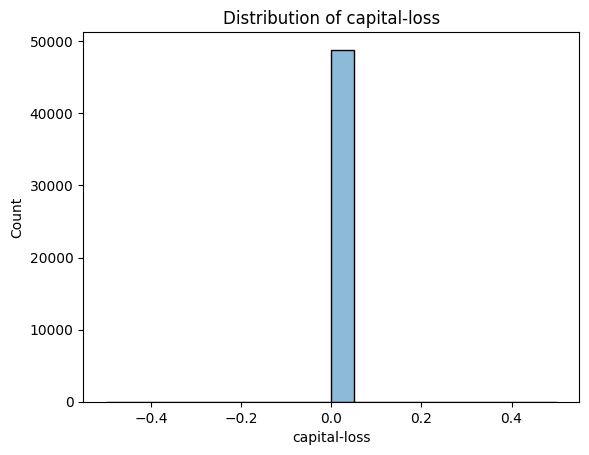

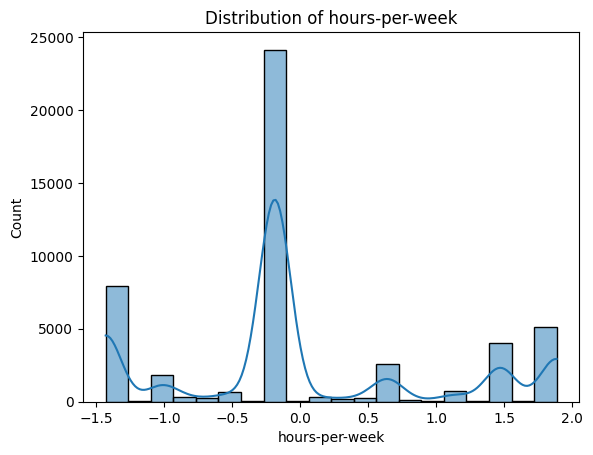

In [33]:
num_cols = ['age', 'fnlwgt', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']
for col in num_cols:
    plt.figure()
    sns.histplot(adult_data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [34]:
corr_matrix = adult_data.corr()
print(corr_matrix)

                                     age    fnlwgt  education-num  \
age                             1.000000 -0.076777       0.041739   
fnlwgt                         -0.076777  1.000000      -0.034830   
education-num                   0.041739 -0.034830       1.000000   
capital-gain                         NaN       NaN            NaN   
capital-loss                         NaN       NaN            NaN   
...                                  ...       ...            ...   
native-country_Thailand         0.000178  0.000120       0.008539   
native-country_Trinadad&Tobago  0.001406  0.003037      -0.009417   
native-country_United-States    0.011038 -0.076096       0.100548   
native-country_Vietnam         -0.013614 -0.007614      -0.005493   
native-country_Yugoslavia       0.003306  0.004485      -0.005690   

                                capital-gain  capital-loss  hours-per-week  \
age                                      NaN           NaN        0.090642   
fnlwgt         

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled)

In [36]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

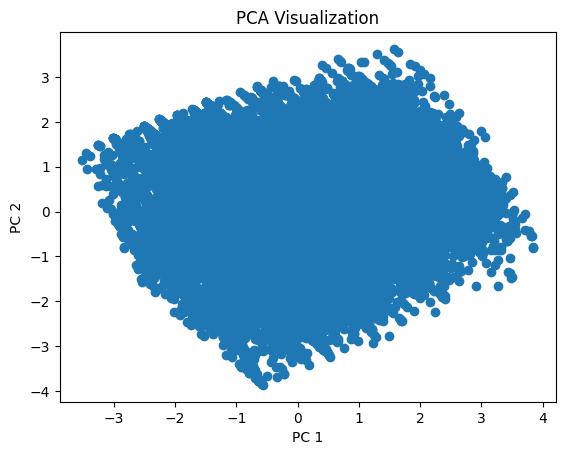

In [37]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA Visualization')
plt.show()

clustering

In [38]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init ='k-means++',max_iter = 300,n_init=10,random_state=0)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)
  labels = kmeans.predict(scaled)
wcss

[195303.99999999822,
 156062.82712518235,
 128602.03545624048,
 108535.71584235114,
 93307.53531358785,
 85482.19760651748,
 79882.93682188916,
 74482.51314694063,
 69958.44678321185,
 66263.01994202664]

Text(0.5, 0, 'no. of clusters')

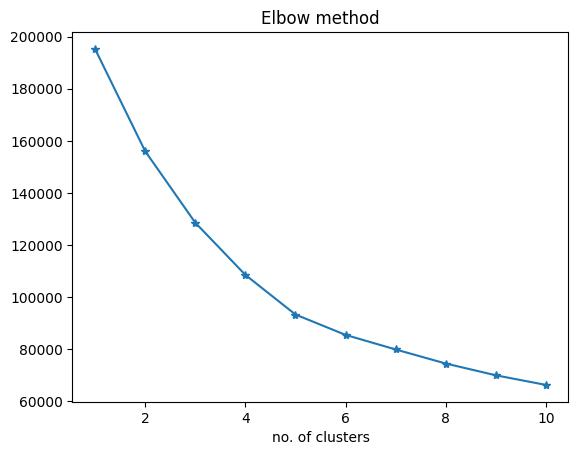

In [39]:
plt.plot(range(1,11),wcss,marker='*')
plt.title('Elbow method')
plt.xlabel('no. of clusters')

In [40]:
wcss = []
sil = []

for i in range(2,11):
  kmeans = KMeans(n_clusters=i,init ='k-means++',max_iter = 300,n_init=10,random_state=0)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)
  labels = kmeans.predict(scaled)
  sil_score = silhouette_score(scaled,labels)
  print('wcss and silhouette score for k = {} is {} and {}'.format(i,kmeans.inertia_,sil_score))
  sil.append(sil_score)
wcss

wcss and silhouette score for k = 2 is 156062.82712518235 and 0.2088132755159162
wcss and silhouette score for k = 3 is 128602.03545624048 and 0.22355987643351496
wcss and silhouette score for k = 4 is 108535.71584235114 and 0.23391480391448452
wcss and silhouette score for k = 5 is 93307.53531358785 and 0.24473933636842446
wcss and silhouette score for k = 6 is 85482.19760651748 and 0.2504940182426363
wcss and silhouette score for k = 7 is 79882.93682188916 and 0.24864643460639452
wcss and silhouette score for k = 8 is 74482.51314694063 and 0.22260591370334049
wcss and silhouette score for k = 9 is 69958.44678321185 and 0.22422765175692835
wcss and silhouette score for k = 10 is 66263.01994202664 and 0.2262754198086256


[156062.82712518235,
 128602.03545624048,
 108535.71584235114,
 93307.53531358785,
 85482.19760651748,
 79882.93682188916,
 74482.51314694063,
 69958.44678321185,
 66263.01994202664]

Text(0, 0.5, 'silhoutte')

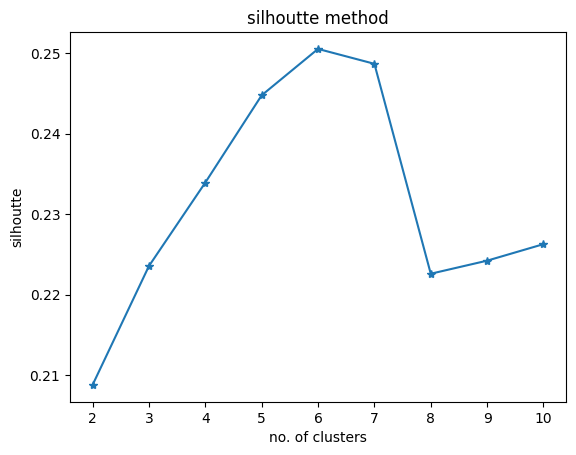

In [41]:
plt.plot(range(2,11),sil,marker='*')
plt.title('silhoutte method')
plt.xlabel('no. of clusters')
plt.ylabel('silhoutte')

In [42]:
kmeans = KMeans(n_clusters= 5,init ='k-means++',max_iter = 300,n_init=10,random_state=0)
kmeans_labels = kmeans.fit_predict(scaled)
adult_data['kmeans_clusters'] = kmeans_labels
adult_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,kmeans_clusters
0,0.028795,-1.146152,1.171344,0.0,0.0,-0.187370,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
1,0.858028,-1.085355,1.171344,0.0,0.0,-1.430414,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
2,-0.046590,0.303009,-0.456772,0.0,0.0,-0.187370,False,False,True,False,...,False,False,False,False,False,False,True,False,False,0
3,1.084182,0.503130,-1.270830,0.0,0.0,-0.187370,False,False,True,False,...,False,False,False,False,False,False,True,False,False,4
4,-0.800438,1.590950,1.171344,0.0,0.0,-0.187370,False,False,True,False,...,False,False,False,False,False,False,False,False,False,3


In [43]:
adult_data['kmeans_clusters'].value_counts()

,count
kmeans_clusters,
0,14335
2,9564
4,8672
1,8557
3,7698


In [ ]:
X = np.array(scaled)
mergings = linkage(X, method='ward')
dendrogram(mergings, leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
for i in range(2,11):
   hc = AgglomerativeClustering(n_clusters= i,linkage= 'ward')
   hc_lables = hc.fit_predict(scaled)
   sil_score = silhouette_score(scaled,hc_lables)
   print('silhouette score for k = {} is {}'.format(i,sil_score))

In [ ]:
hc = AgglomerativeClustering(n_clusters= 5,linkage= 'ward')
hc_labels = hc.fit_predict(scaled)
adult_data['hc_clusters'] = hc_labels
adult_data.head()